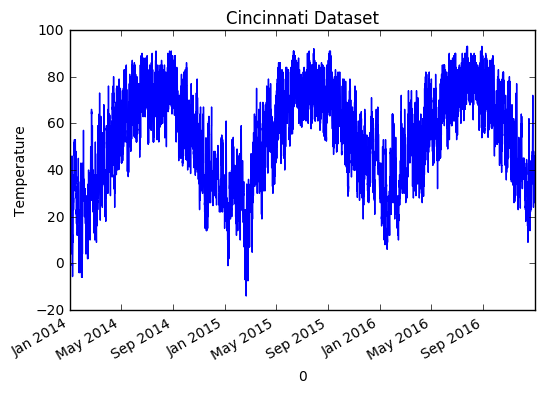

In [38]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime(x,'%Y-%m-%d %H')
 
series = read_csv('dataset/feature_CIN.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series = series['12']
series.plot(title='Cincinnati Dataset')
pyplot.ylabel('Temperature')

pyplot.show()

In [39]:
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

    t-1   t+1
0   NaN  24.0
1  24.0  24.0
2  24.0  24.0
3  24.0  22.0
4  22.0  21.0


In [40]:
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [41]:
def model_persistence(x):
	return x


In [42]:
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print ('Test MSE:%.3f' % test_score)

Test MSE:6.679


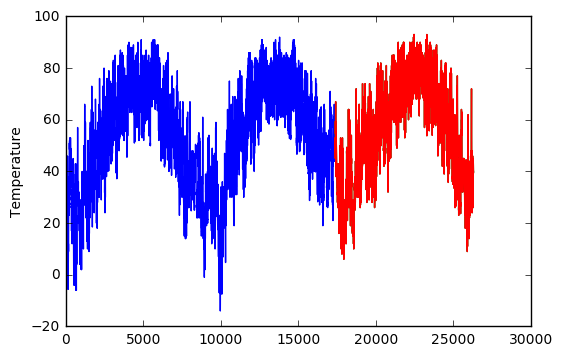

In [43]:
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.ylabel('Temperature')
pyplot.show()